In [76]:
# Import packages & setup dataframes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funky import extractor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report

# names=['ID', 'M1', 'M2', 'S1', 'S2', 't_pair', 't_elapsed','kick','Mrem', 'Srem', 'esca_v', 'Mcluster', 'gen', 'Z', 'gen_max']
df_gc = extractor('gc')
df_nsc = extractor('nsc')
df_ysc = extractor('ysc')

In [77]:
min_evo = df_nsc.loc[df_nsc.groupby('ID')['gen'].idxmin()]

In [78]:
min_evo_gc = df_gc.loc[df_gc.groupby('ID')['gen'].idxmin()]

In [89]:
# separate test set, create label set
dumped_features = ['ID', 'gen', 'gen_max']
nsc_train, nsc_test, fate_train, fate_test = train_test_split((train_feats := min_evo.drop(columns=dumped_features)), min_evo['gen_max'], test_size=0.2)


forest = RandomForestClassifier(n_estimators=20, max_depth=10, random_state=1758, n_jobs=-1, class_weight='balanced')

In [90]:
forest.fit(nsc_train, fate_train)

RandomForestClassifier(class_weight='balanced', max_depth=20, n_estimators=50,
                       n_jobs=-1, random_state=1758)

In [91]:
print(classification_report(fate_test, forest.predict(nsc_test)))

/home/teobaldo/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           2       1.00      0.99      0.99    479838
           3       0.78      0.95      0.85     31857
           4       0.14      0.08      0.10      3420
           5       0.01      0.00      0.00       606
           6       0.00      0.00      0.00       154
           7       0.00      0.00      0.00        39
           8       0.00      0.00      0.00        20
           9       0.00      0.00      0.00         5
          10       0.00      0.00      0.00         5
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1

    accuracy                           0.98    515946
   macro avg       0.18      0.18      0.18    515946
weighted avg       0.98      0.98      0.98    515946



/home/teobaldo/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/teobaldo/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [45]:
print(forest.score(df_ysc.drop(columns=dumped_features), df_ysc['gen_max']))

0.7897877063965589


In [34]:
importances = pd.Series(forest.feature_importances_, index=list(train_feats))

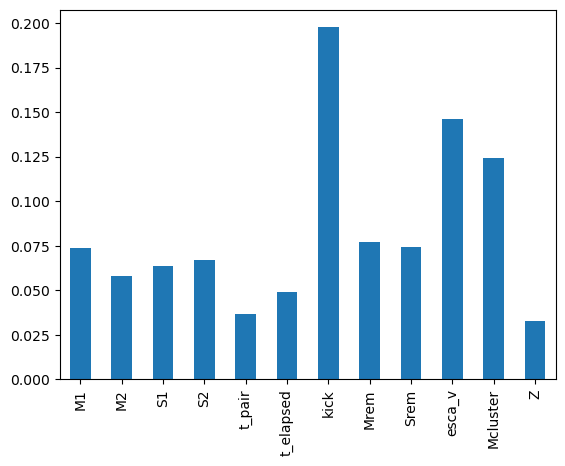

In [35]:
importances.plot.bar()
plt.show()